In [ ]:
# MIT License
#
#@title Copyright (c) 2023 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# NLP Models for Climate Policy Analysis Part 1: Evidence Synthesis


Author(s):
*   Daniel Spokoyny, CMU, dspokoyn@cs.cmu.edu
*   Max Callaghan, MCC-Berlin, callaghan@mcc-berlin.net
*   Tobias Schimanski, University of Zurich, tobias.schimanski@df.uzh.ch


# Table of Contents

*   [Target Audience](#target-audience)
*   [Overview](#overview)
*   [Contributions](#contributions)
*   [Software Requirements](#software-requirements)
*   [Data Source](#data-source)
*   [Model Pipeline](#model-pipeline)
*   [Model Evaluation](#model-evaluation)

<a name="target-audience"></a>
# Target Audience

*   Climate scientists seeking to explore how to apply NLP technologies to analyze academic papers on climate change.
*   Data scientists with minimal background in machine learning looking for concrete examples of applying NLP for climate policy texts.

<a name="overview"></a>
# Overview

It is essential that regulators, law makers, and policitians **write** informed climate policy decisions and **evaluate** existing climate policies based on scientific evidence.
Climate policy evaluation, which allows for the development, assessment, and improvement of regulation, increases transparency and public support, and encourages public and private sector entities to make pledges or increase their levels of action.

Academic literature provides another valuable source of information for conducting climate policy evaluation studies.
Since there is such an *abundance of scientific literature*, it is important to have a systematic review of the literature to write *a report that summarizes* the current state of the science.
However, systematic evidence mapping or identifying which papers are relevant to a particular policy is a necessary first step.

In this tutorial, we will explore how Natural Language Processing (NLP) can be used to assist in identifying and mapping climate-relevant literature using a supervised learning approach.


The outline of the tutorial is as follows:

(1) We will explore the dataset and build a pipeline for a simple machine learning model, \
(2) Then demonstrate how to train a supervised SVM classifier which is a more sophisticated model, \
(3) Finally, we will train and evaluate pretrained transformer models.

<a name="contributions"></a>
# Contributions

Through introductory presentations and colab notebooks, we aim to expose the participants to:

(a) An example of a task pertinent to **climate policy analysis** \
(b) Build an intuition for simple **NLP count based** models and classification metrics\
(c) Learn more advanced **supervised learning** models such as SVMs and transformers

<a name="Motivation"></a>
# Motivation

![Cover of 5th IPCC report](https://github.com/dspoka/ccai-nlp-tutorial-2023/blob/main/images/syrcover.png?raw=1)

It is the job of the [IPCC](https://www.ipcc.ch/) to provide comprehensive, objective and transparent assessments of the scientific literature on climate change. The reports, which are published every 6-7, years serve as trusted sources of information across climate science, impacts & adaptation, and mitigation. Because the summaries for policymakers are approved by national governments, the reports are also vital in international climate negotiations and are key tools for holding governments accountable.

The three working groups of the IPCC
- WGI: The Physical Science Basis
- WGII: Impacts, Adaptation and Vulnerability
- WGIII: Mitigation of Climate Change

have all recently published their sixth assessment report, with a synthesis report published in March 2023.

## Problem: Comprehensive assessments, an increasingly intractable task

![Graph showing growth in studies on climate change](https://github.com/dspoka/ccai-nlp-tutorial-2023/blob/main/images/literature_growth.svg?raw=1)

Whereas early IPCC reports had hundreds or thousands of scientific studies on climate change to contend with, during the most recent assessment report more than 300,000 studies were published on climate change ([Callaghan et al., 2020](https://www.nature.com/articles/s41558-019-0684-5)). Although the reports have got bigger - involving more authors, comprising more pages, and containing more references - this has not kept pace with the growth in the literature. With the IPCC citing an increasingly small proportion of available relevant literature, the question of what they cite and how this is selected becomes ever more important.

## Evidence synthesis methods
Evidence synthesis ([overview](https://www.lshtm.ac.uk/research/centres/centre-evaluation/evidence-synthesis)) describes a suite of formal methods for selecting and assessing evidence on a research question. These are most frequently used in the medical domain, where important decisions with life-or-death outcomes are rarely made based on single studies, or on "normal" literature reviews (where a single expert or experts select and summarise a literature with no formal procedures for how evidence is selected or assessed).

Evidence synthesis methods prioritise comprehensiveness in the evidence base assessed, as well as transparency in how this is identified, selected and assessed.

## Machine-learning assisted evidence synthesis

Many processes in evidence synthesis, such as screening potentially relevant studies, or coding studies according to the type of evidence they provide, are repetitive and time consuming. As the number of papers grows, these processes present larger and larger challenges to the goal of producing comprehensive assessments.

Repetitive and time consuming tasks are exactly those where machine-learning can be helpful. Research is mostly recorded in written texts, so that means the ML tools we are looking for come from the area of Natural Language Processing (NLP).

So far the uses of ML in evidence synthesis are:

- **Identifying relevant studies**: A simple binary classifier can be trained on human screened data (studies labelled with 0, or 1 for relevant) to predict whether documents without labels will be relevant or not
- **Classifying studies**: Machine learning can be used to give useful content labels to studies, either using
  - **Unsupervised** methods like topic modelling, which need no human input but cannot assign to documents to predefined categories; or
  - **Supervised** methods, where models predict the labels of unseen documents, based on the *predefined* labels assigned by humans.


In this tutorial we will be exploring how we can use supervised methods to identify and classify evidence on climate impacts, following a simplified version of a pipeline used in this [publication](https://www.nature.com/articles/s41558-021-01168-6.epdf?sharing_token=7Sw0J3PwoQNKriW6TbOuX9RgN0jAjWel9jnR3ZoTv0PwAcRfhcoupIk0A95eY8_-YUKjuCHE46BRE8RXMy_HNaRNTl48Ji0i6-pYLEd3WbQwXQpTp1LscjrMM5Am67huate7yo35BOmH8Yq08b_CuYEhHpq1-SwJh0A5XD6kKvE%3D).

<a name="software-requirements"></a>
# Software Requirements
This notebook requires the following libraries:
*   datasets (pip)
*   transformers (pip)

`datasets` is a library which we will use to download the data required.
`transformers` is a library which we will use to load pre-trained language models from.

The package is written using `PyTorch` and `sklearn` machine learning libraries.

In [ ]:
# We need to install the following packages to run the code in this notebook
# This should take about 1 to 2 minutes.
# %%capture
!pip install datasets
!pip install transformers
!pip install accelerate

<a name="data-source"></a>
# Data Source

In order to carry out evidence synthesis, we need to get our hands on data from bibliographic databases. There a multitude of different databases out there: some are general, while others are specific to a particular discipline. Some focus solely on peer-reviewed journals, while others may focus on, or also contain, preprints, conference proceedings, scientific reports, PhD theses, or other "grey" literature sources (for an overview of available databases and their disciplinary coverage check out [Gusenbauer, 2022](https://link.springer.com/article/10.1007/s11192-022-04289-7). In evidence synthesis projects, comprehensiveness is important, so searching as many relevant databases *as is practicable* is usually seen as best practice.  

<!-- ![image](images/OpenAlex-logo-5.2de7053c.png) -->

In this tutorial, we have prepared a dataset for you based on a database called [OpenAlex](https://openalex.org/). This database attempts to be as comprehensive as possible. It has some limitations in how you can search, but it does have an open (and importantly unlimited) API, and is free and open source. Because of the search limitations it will not (easily) a full reproduction of our previous study, but this is the best we can do with a single open-access resource. In future evidence synthesis projects you should consider the full breadth of available open and proprietary resources.

<br/><br/>

## Data Exploration
We have preprocessed and prepared two sources of data for you to use in this tutorial:
-  labeled_data: which contains "INCLUDE" where 1 means the study was used in the synthesis report, and 0 means it was not.
-  unlabeled_data: which contains studies from the OpenAlex database.
All studies in the labeled_data are "seen", since a human has reviewed them all to conclude whether to include them in the report or not. The unlabeled_data is unseen (seen=0), since they were not reviewed by a human.

Lets download the data and have a look at it.

In [ ]:
import pandas as pd
from huggingface_hub import hf_hub_download
import matplotlib.pyplot as plt
import numpy as np
import re

# Here we will download the openalex dataset from the huggingface hub.
filepath = hf_hub_download(repo_id="dspoka/ccai-nlp-tutorial-1", filename="openalex_data.csv", repo_type="dataset")
with open(filepath) as f:
    unlabeled_data = pd.read_csv(f)


print(f'The dataset has {unlabeled_data.shape[0]} rows and {unlabeled_data.shape[1]} columns')
print(f'The columns are: {unlabeled_data.columns.values}')
unlabeled_data.head()


The dataset has 24906 rows and 6 columns
The columns are: ['id' 'doi' 'title' 'publication_year' 'abstract' 'authors']


,id,doi,title,publication_year,abstract,authors
0,https://openalex.org/W2076977109,https://doi.org/10.1038/nature03906,Increasing destructiveness of tropical cyclone...,2005,NaN,Kerry Emanuel
1,https://openalex.org/W2171979944,https://doi.org/10.1007/s00425-003-1105-5,"Plant responses to drought, salinity and extre...",2003,NaN,"Wang-Xia Wang, Basia Vinocur, Arie Altman"
2,https://openalex.org/W2122582889,https://doi.org/10.1073/pnas.0505734102,Regional vegetation die-off in response to glo...,2005,Future drought is projected to occur under war...,"David D. Breshears, Neil S. Cobb, Paul Rich, K..."
3,https://openalex.org/W2170327428,https://doi.org/10.1073/pnas.1422385112,Anthropogenic warming has increased drought ri...,2015,Significance California ranks first in the Uni...,"Noah S. Diffenbaugh, Daniel L. Swain, Danielle..."
4,https://openalex.org/W2154180993,https://doi.org/10.1038/nature04188,Impact of regional climate change on human health,2005,NaN,"Jonathan A. Patz, Diarmid Campbell-Lendrum, Tr..."


## Understanding the OpenAlex Dataset (unlabeled_data)
- Each row corresponds to an academic paper and has some columns with metadata like the publication year, list of authors, etc.
- The important columns that we will use are
    - 'abstract' and the 'title' which is string text.
    - A unique identifier called 'id'.
    - And some metadata like 'publication_year', 'authors', 'doi'.

## Basic exploration
Now that we have the data in a convenient format, we can begin to explore the data, e.g. by plotting the number of publications in each year

(24906, 6)


<Axes: xlabel='publication_year'>

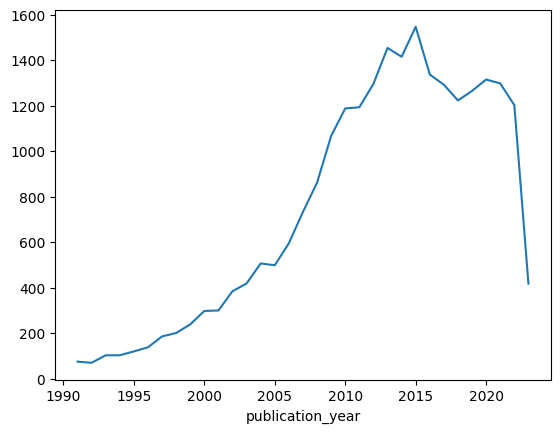

In [ ]:
print(unlabeled_data.shape)
unlabeled_data.query("publication_year>1990").groupby("publication_year")["id"].count().plot()

<a name="model-pipeline"></a>
# Model Pipeline

In this part we'll go through the steps we need to take to load labelled data and train a model to predict a label based on text input. We'll start off with a simple model using Support Vector Machines (SVMs), before exploring how we would do this using by fine-tuning a language model using [transformers](https://huggingface.co/docs/transformers/index) 🤗

## Labeled Data

We'll start by loading our labels and merging these with the studies we downloaded from OpenAlex

In [ ]:
filepath = hf_hub_download(repo_id="dspoka/ccai-nlp-tutorial-1", filename="labelled_data.csv", repo_type="dataset")
with open(filepath) as f:
    labeled_data = pd.read_csv(f)

# We create a lower case version of the title without spaces and punctuation, to allow for merging
labeled_data["title_lcase"] = labeled_data["title"].apply(lambda x: re.sub("\W", "", x).lower() if isinstance(x, str) else x)

# We also want to get rid of documents without abstracts, as we can't use these for learning
labeled_data = labeled_data.dropna(subset=["abstract"])
print(labeled_data.shape)
labeled_data.head()

(2500, 11)


,id,abstract,title,seen,INCLUDE,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES,title_lcase
0,1448689,"The city of Bismarck, North Dakota has one of ...",Key Factors Influencing the Incidence of West ...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,keyfactorsinfluencingtheincidenceofwestnilevir...
1,3281128,Changing precipitation regimes can profoundly ...,Asymmetric responses of plant community struct...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,asymmetricresponsesofplantcommunitystructurean...
2,900708,Climate influences forest structure through ef...,Climate effects on fire regimes and tree recru...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,climateeffectsonfireregimesandtreerecruitmenti...
3,3234419,"Climate change is likely to bring more, hotter...",Climate change adaptation and mitigation ? a h...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,climatechangeadaptationandmitigationahitherton...
4,2090028,Aim The long-term stability of coastal ecosyst...,Caribbean mangroves adjust to rising sea level...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,caribbeanmangrovesadjusttorisingsealevelthroug...


In [ ]:
# Now we load the Open alex data, and create the same title variable for merging
unlabeled_data = unlabeled_data.rename(columns={"id": "OA_id"})
unlabeled_data["title_lcase"] = unlabeled_data["title"].apply(lambda x: re.sub("\W", "", x).lower() if isinstance(x, str) else x)
unlabeled_data = unlabeled_data.dropna(subset=["abstract"]).copy()
unlabeled_data.loc[:, "seen"] = 0
print(f'The dataset has {unlabeled_data.shape[0]} rows and {unlabeled_data.shape[1]} columns')
#unlabeled_data.head()

# Now we add the OpenAlex rows which are not in the labelled data to the labelled_data
# print(unlabeled_data[~unlabeled_data["title_lcase"].isin(labeled_data["title_lcase"])].shape)

df = pd.concat(
    [labeled_data, unlabeled_data[~unlabeled_data["title_lcase"].isin(labeled_data["title_lcase"])]]
)
print(df.shape)
df.head()

The dataset has 18556 rows and 8 columns
(20771, 15)


,id,abstract,title,seen,INCLUDE,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES,title_lcase,OA_id,doi,publication_year,authors
0,1448689.0,"The city of Bismarck, North Dakota has one of ...",Key Factors Influencing the Incidence of West ...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,keyfactorsinfluencingtheincidenceofwestnilevir...,NaN,NaN,NaN,NaN
1,3281128.0,Changing precipitation regimes can profoundly ...,Asymmetric responses of plant community struct...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,asymmetricresponsesofplantcommunitystructurean...,NaN,NaN,NaN,NaN
2,900708.0,Climate influences forest structure through ef...,Climate effects on fire regimes and tree recru...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,climateeffectsonfireregimesandtreerecruitmenti...,NaN,NaN,NaN,NaN
3,3234419.0,"Climate change is likely to bring more, hotter...",Climate change adaptation and mitigation ? a h...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,climatechangeadaptationandmitigationahitherton...,NaN,NaN,NaN,NaN
4,2090028.0,Aim The long-term stability of coastal ecosyst...,Caribbean mangroves adjust to rising sea level...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,caribbeanmangrovesadjusttorisingsealevelthroug...,NaN,NaN,NaN,NaN


Importantly, we save the **df** dataset here. We will use it later for our classifiers.

### Inspecting our labels

We can take a quick look at how many of which type of labels we have

Number of seen vs. unseen documents
seen
0.0    18262
1.0     2500
Name: title, dtype: int64
--------------------------------------------------------------------------------
Number of included vs. excluded documents
INCLUDE
0.0    1194
1.0    1306
Name: title, dtype: int64


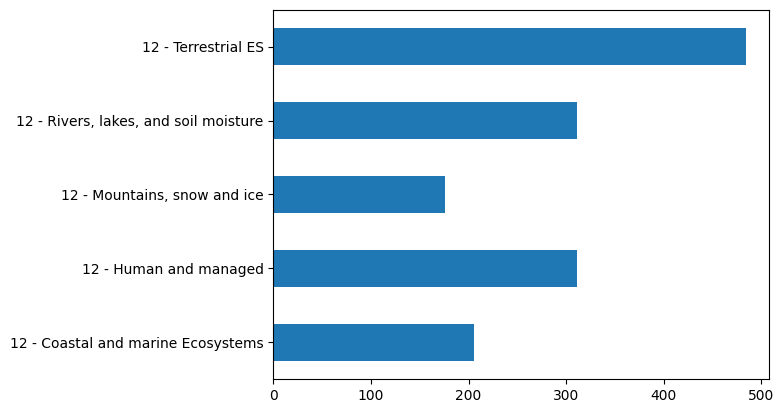

In [ ]:
def inspect_labels(df):
    # We can quickly plot how many documents have been labelled, and how many not
    # df.groupby("seen")["title"].count().plot.bar();
    print('Number of seen vs. unseen documents')
    print(df.groupby("seen")["title"].count())
    print('-'*80)
    # and also plot how many of the labelled docs were included
    # df.groupby("INCLUDE")["title"].count().plot.bar()

    print('Number of included vs. excluded documents')
    print(df.groupby("INCLUDE")["title"].count())
    # Finally we can plot how many examples of each impact type we have
    df[impacts].sum().plot.barh();

impacts = [x for x in df.columns if re.match("12 -", x)]
inspect_labels(df)

For training classifiers, it is essential to create a training and testing dataset. Hence, we define the following function:

In [ ]:
from sklearn.model_selection import train_test_split
def train_test_split_df(df):
    ''' Gets train/test splits for INCLUDE prediction task.
    '''
    # select only the seen documents
    all_seen = df[df["seen"] == 1].sample(2000).index
    all_x = df[df["seen"] == 1]["abstract"].values
    all_y = df[df["seen"] == 1]["INCLUDE"].values.astype(int)
    # percent of data to use for train, val, test
    train_size = 0.8
    # train_size = 0.01
    # get the indices for each split
    x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, train_size=train_size, random_state=42)
    assert len(x_train) == len(y_train)
    assert len(x_test) == len(y_test)
    print (f"Train size: {len(x_train)}")
    print (f"Test size: {len(x_test)}")
    return x_train, y_train, x_test, y_test

## A pipeline for a simple machine learning model

Now we want to put together a pipeline for a simple machine learning model. We'll start off by trying to predict the binary INCLUSION label, then move onto the impact type, which is a **multilabel** output. This means each document can be labelled with one or more of the impact types.

In each case, though, the first thing we need to do is to encode our text input, so it can be used in our models. To do this, we'll take a look at approaches from the feature extraction module from [scikitlearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text): `CountVectorizer` and `TfidfVectorizer`.

In [ ]:
def visualize_doc_vec(X, features=None):
    '''Simple function to visualise a document-term matrix'''
    print('Document-term matrix:\n', X.todense())
    # And we could visualise this simply like this
    fig, ax = plt.subplots()
    doc_map = ax.imshow(X.todense(), cmap="Blues")
    ax.set_xticks(np.arange(len(features)))
    ax.set_xticklabels(features, rotation=45, ha="right")
    cbar = fig.colorbar(doc_map)
    plt.show()

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


def show_raw_counts(texts):
    '''
    Function to show the raw counts of words in a corpus and visualize them.
    '''
    # We'll instantiate a vectorizer class
    vectorizer = CountVectorizer()

    # And apply the fit_transform method to our texts
    X = vectorizer.fit_transform(texts)

    # This gives us a matrix of shape n_texts, vocab_size
    X.todense()

    # The features each column represents can be accessed here
    features = vectorizer.get_feature_names_out()
    visualize_doc_vec(X, features)

Document-term matrix:
 [[0 0 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 [0 0 2 ... 1 1 0]]


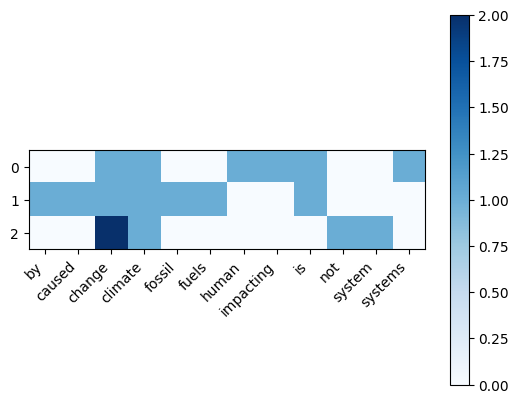

In [ ]:
# Let's take for now a couple of example texts
texts = [
    "Climate change is impacting human systems",
    "Climate change is caused by fossil fuels",
    "System change not climate change",
]
# And now lets visualize the raw word counts in our 3 sentences.
show_raw_counts(texts)

As we can see, each document is a row, each column is a feature. The cells contain the number of times each word occurs in each document.

However, by adding a small amount of complexity we can generate a more useful way of representing these texts.

Term frequency inverse document frequency ([TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) gives greater weight to those terms which appear infrequently in the corpus, meaning that very frequent but uninformative terms like "the" are given less importance.

In [ ]:
def show_tfidf(texts):
    '''
    Function to show the tf-idf scores of words in a corpus and visualize them.
    '''
    # We'll instantiate a term frequency - inverse document frequency vectorizer class
    vectorizer = TfidfVectorizer()

    # And apply the fit_transform method to our texts
    X = vectorizer.fit_transform(texts)

    # This gives us a matrix of shape n_texts, vocab_size
    X.todense()

    # The features each column represents can be accessed here
    features = vectorizer.get_feature_names_out()
    visualize_doc_vec(X, features)

Document-term matrix:
 [[0.         0.         0.28561676 ... 0.         0.         0.48359121]
 [0.43535684 0.43535684 0.25712876 ... 0.         0.         0.        ]
 [0.         0.         0.61046311 ... 0.51680194 0.51680194 0.        ]]


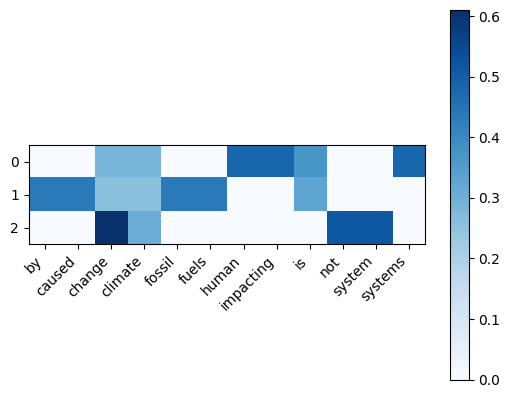

In [ ]:
show_tfidf(texts)

## Learning from features

Support Vector Machines (SVM) work by finding a hyperplane in a multi-dimensional space that separates samples of different classes. The matrix we have visualised above forms our multidimensional space. In simple words, an SVM builds a decision boundary between classes. For this, the classes need labels (which the dataset above fortunately has and we will simulate for now).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def build_svm(toy_texts, y):
    '''
    Function to create a pipeline with a tf-idf vectorizer and a support vector machine classifier.
    '''
    svm_classifier = Pipeline(
        steps=[
            ("vect", TfidfVectorizer()),
            ("clf", SVC(probability=True, class_weight="balanced")),
        ]
    )
    svm_classifier.fit(toy_texts, y)
    return svm_classifier


# We'll slightly expand our list of texts
toy_texts, y = zip(
    *[
        ("Climate change is impacting human systems", 1),
        ("Climate change is caused by fossil fuels", 0),
        ("Agricultural yields are affected by climate change", 1),
        ("System change not climate change", 0),
        ("higher temperatures are impacting human health", 1),
        ("Forest fires are becoming more frequent due to climate change", 1),
        ("Machine learning can read texts", 0),
        ("AI can help solve climate change!", 0),
        ("We need to save gas this winter", 0),
        ("More frequent droughts are impacting crop yields", 1),
        ("Many communities are affected by rising sea levels", 1),
        ("Global emissions continue to rise", 0),
        ("Ecosystems are increasingly impacted by rising temperatures", 1),
        ("Emissions from fossil fuels need to decline", 0),
        ("Anthropogenic climate change is impacting vulnerable communities", 1),
    ]
)

# Now lets build a simple SVM classifier on this toy data

svm_classifier = build_svm(toy_texts, y)
svm_classifier

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SVC(class_weight='balanced', probability=True))])

In [ ]:
# We can now use this classifier to make predictions about new texts

# Here are a couple of easy examples (easy because they are similar to our examples)
new_texts = [
    "climate change is impacting terrestrial ecosystems",
    "Machine Learning will solve climate change",
    "Coca Cola is a company that produces sugary drinks",
]
# We can make predictions about which class the examples belong to
print('predictions:', svm_classifier.predict(new_texts))
# We can also get these as probabilities (which are very unstable with small datasets, and not guaranteed to match the predictions)
print('probabilities:\n', svm_classifier.predict_proba(new_texts))

predictions: [1 0 1]
probabilities:
 [[0.47595172 0.52404828]
 [0.45574361 0.54425639]
 [0.46922348 0.53077652]]


In [ ]:
# Each row contains predicted probabilites for each class, in this case 0, and 1

# We can get predicted probabilities of being in the INCLUDE class like this
# One for each of the three examples
svm_classifier.predict_proba(new_texts)[:, 1]

In [ ]:
from sklearn.metrics import classification_report

def train_eval_svm(df):
    '''
    Function to that trains with train data and evalutes the model with test data.
    '''
    # load the train/test splits
    x_train, y_train, x_test, y_test = train_test_split_df(df)
    # build the classifier
    svm_classifier = build_svm(x_train, y_train)
    # get the predictions on the test set
    test_pred = svm_classifier.predict(x_test)
    # Get the classification evaluation metrics
    # This will be covered in more detail later.
    print(classification_report(y_test, test_pred))

In [ ]:
# So far this was an illustrative example using toy data. Let's now apply this to our real data.
# takes around 20 seconds to run
train_eval_svm(df)

Train size: 2000
Test size: 500
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       235
           1       0.82      0.87      0.84       265

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



## Multilabel

Multilabel problems are those where any sample can belong to any of the classes (as opposed to multiclass problems where each sample must belong to **exactly 1** class. In our dataset, most documents which were marked as relevant are assigned to one class, with some assigned to two, and very few assigned to three.

In [ ]:
# Show the different classes of impacts.
print(impacts)
df[df["INCLUDE"] == 1].head()

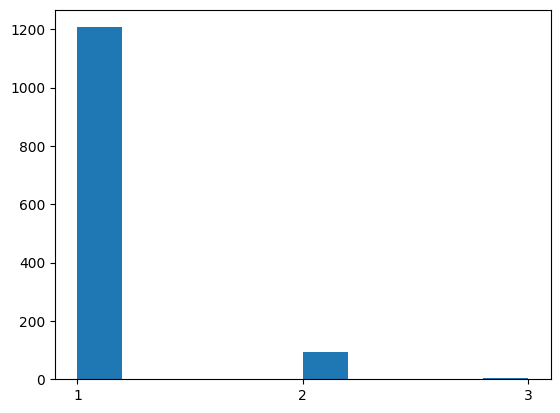

In [ ]:
# This plot shows that certain documents have multiple labels for different impacts.
plt.hist(df[df["INCLUDE"] == 1][impacts].sum(axis=1))
plt.xticks(np.arange(1, 4, 1))
plt.show()

To prepare our target for the model, we simply create a matrix with a row for each document and a column for each class

In [ ]:
# create an x and y variable with a sample of 200 relevant documents
samples = df[df["INCLUDE"] == 1].sample(200).index
X = df.iloc[samples]["abstract"]
y = df.iloc[samples][impacts].values
np.set_printoptions(threshold=5)
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Now we just need to slightly amend our pipeline by defining how we want to approach the multilabel problem.

We use a One vs Rest classifier which simply creates a binary classifier for each class

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

clf = Pipeline(
    steps=[
        ("vec", TfidfVectorizer()),
        ("clf", OneVsRestClassifier(SVC(probability=True, class_weight="balanced"))),
    ]
)

clf.fit(X, y)

Pipeline(steps=[('vec', TfidfVectorizer()),
                ('clf',
                 OneVsRestClassifier(estimator=SVC(class_weight='balanced',
                                                   probability=True)))])

In the same way as before, we can make predictions with some sample texts.

In [ ]:
example_texts = [
    "Climate change has affected butterfly phenology in North America. "
    + "In an experiment in the butterfly national park, we found that "
    + "mean dates of appearance had shifted by two weeks. Species traits, "
    + "especially ecological traits, were found to explain some part of "
    + "different phenological responses",

    "Rising temperatures have contributed to increasing heat related mortaility "
    + "in cities across Europe. ",
]
y_pred = clf.predict(example_texts)

pd.DataFrame(y_pred, columns=impacts)

,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES
0,0,0,0,0,1
1,0,0,0,0,0


## Transfer learning with transformers!

A more powerful way to do classification is to fine-tune a langauge model which has been pretrained on large amounts of text. For an introduction to how these work (which is outside the scope of this tutorial) check out [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/).

The [Transformers](https://huggingface.co/docs/transformers) library makes doing this really easy, and there are a wealth of models available with different features and which have been pretrained on different corpora. We are going to use [ClimateBert](https://huggingface.co/climatebert), which has undergone additional pretraining on texts from the climate domain (included scientific articles).

Thus, a decisive difference to before is that ClimateBERT already learned understanding "language", i.e., the features we extracted from the text before. ClimateBERT fine-tuning will only enable the language-understanding model to learn by example.

In [ ]:
# Let's take our texts and our labels again
# Each example is a tuple of (text, label)
# Where a label is 1 if the text is relevant and should be included in a synthesis report and 0 otherwise
texts, y = zip(
    *[
        ("Climate change is impacting human systems", 1),
        ("Climate change is caused by fossil fuels", 0),
        ("Agricultural yields are affected by climate change", 1),
        ("System change not climate change", 0),
        ("higher temperatures are impacting human health", 1),
        ("Forest fires are becoming more frequent due to climate change", 1),
        ("Machine learning can read texts", 0),
        ("AI can help solve climate change!", 0),
        ("We need to save gas this winter", 0),
        ("More frequent droughts are impacting crop yields", 1),
        ("Many communities are affected by rising sea levels", 1),
        ("Global emissions continue to rise", 0),
        ("Ecosystems are increasingly impacted by rising temperatures", 1),
        ("Emissions from fossil fuels need to decline", 0),
        ("Anthropogenic climate change is impacting vulnerable communities", 1),
    ]
)

In [ ]:
# To use these with transformers, we are going to need to get them into the right format.
from datasets import Dataset
from transformers import AutoTokenizer

# First we'll put them into a HuggingFace Dataset object
dataset = Dataset.from_dict({"text": texts, "label": y})

# And now we need to tokenize the texts, using the pretrained tokenizer from climatebert
model_name = "climatebert/distilroberta-base-climate-f"
tokenizer = AutoTokenizer.from_pretrained(model_name)


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="longest", truncation=True)


tokenized_dataset = dataset.map(tokenize_function, batched=True)
# input_ids are the token ids for each token in the text
# attention_mask is a mask that tells the model which tokens to pay attention to and which to ignore
# Note the attention mask has 0s for padded tokens.
tokenized_dataset[0]

In [ ]:
# We can wrap this into one function that turns any set of texts (and optional labels)
# into a tokenized huggingface dataset
def datasetify(x, tokenizer, y=None):
    data_dict = {"text": x}
    if y is not None:
        data_dict["label"] = y
    dataset = Dataset.from_dict(data_dict)

    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="longest", truncation=True)

    return dataset.map(tokenize_function, batched=True)


tokenized_dataset = datasetify(texts, tokenizer, y)
tokenized_dataset[0]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

{'text': 'Climate change is impacting human systems',
 'label': 1,
 'input_ids': [0,
  40466,
  464,
  16,
  18081,
  1050,
  1437,
  50278,
  2,
  1,
  1,
  1,
  1,
  1,
  1],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]}

In [ ]:
# Now we want to load our model, and instantiate a Trainer class
from transformers import AutoModelForSequenceClassification, Trainer, logging
import torch
from torch.nn import functional as F

logging.set_verbosity_warning()

# We set num_labels to 2 for binary classification, as we have two classes - positive and negative
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
# The trainer class needs to be supplied with a model, and a dataset (and will also accept TrainingArguments and validation data)

trainer = Trainer(model=model, train_dataset=datasetify(texts, tokenizer, y))
# Once this has been instantiated we can apply the train() method
trainer.train()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Step,Training Loss


TrainOutput(global_step=6, training_loss=0.6996731758117676, metrics={'train_runtime': 12.4208, 'train_samples_per_second': 3.623, 'train_steps_per_second': 0.483, 'total_flos': 174639636900.0, 'train_loss': 0.6996731758117676, 'epoch': 3.0})

In [ ]:
# To generate predictions, we just need to supply a dataset to the predict method
new_texts = [
    "climate change is impacting terrestrial ecosystems",
    "Machine Learning will solve climate change",
    "Supreme court made a series of decisions on personal freedom",
]


pred = trainer.predict(datasetify(new_texts, tokenizer))
pred

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

PredictionOutput(predictions=array([[-0.03052713,  0.0084821 ],
       [-0.00790653, -0.01241906],
       [ 0.00037183, -0.02309463]], dtype=float32), label_ids=array([1, 0, 0]), metrics={'test_loss': 0.682069718837738, 'test_runtime': 0.1504, 'test_samples_per_second': 19.941, 'test_steps_per_second': 6.647})

In [ ]:
# However, the model output gives us logits. If these are negative, then the prediction
# is negative, if they are positive, the prediction is positive.
# We can turn these into probabilities with an activation function
from torch import tensor
from torch.nn import Sigmoid, Softmax

activation = (
    Softmax()
)  # Since we have two exclusive classes, we use the Softmax function
activation(tensor(pred.predictions))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.4902, 0.5098],
        [0.5011, 0.4989],
        [0.5059, 0.4941]])

In [ ]:
# If we want to always get probabilities, we can subclass Trainer and add a new predict_proba method

from transformers.trainer_utils import PredictionOutput


class ProbTrainer(Trainer):
    def predict_proba(self, test_dataset: Dataset) -> PredictionOutput:
        logits = self.predict(test_dataset).predictions
        if logits.shape[1] > 2:
            activation = Sigmoid()
        else:
            activation = Softmax(dim=1)
        return activation(tensor(logits)).numpy()


trainer = ProbTrainer(model=model, train_dataset=datasetify(texts, tokenizer, y))
trainer.train()

pred = trainer.predict_proba(datasetify(new_texts, tokenizer))
pred


Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Step,Training Loss


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

array([[0.47383365, 0.52616644],
       [0.5515017 , 0.44849834],
       [0.53422064, 0.4657793 ]], dtype=float32)

In [ ]:
def one_hot_encode(targets, num_labels):
    '''Helper function to one-hot encode the labels'''
    return F.one_hot(targets, num_labels)


def train_eval_transformer(df):
    ''' Trains a pretrained transformer model for the binary classification task
        of predicting whether a study abstract should be included in a synthesis report.
    '''
    # load the train/test splits
    x_train, y_train, x_test, y_test = train_test_split_df(df)
    # build the classifier
    # We set num_labels to 2 for binary classification, as we have two classes - positive and negative
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
    y_train_one_hot = one_hot_encode(torch.tensor(y_train), 2)

    # trainer = Trainer(model=model, train_dataset=datasetify(x_train, tokenizer, y_train_one_hot))
    trainer = ProbTrainer(model=model, train_dataset=datasetify(x_train, tokenizer, y_train_one_hot))


    # Once this has been instantiated we can apply the train() method
    trainer.train()

    # get the predictions on the test set
    test_pred = trainer.predict_proba(datasetify(x_test, tokenizer))
    print('test_pred', len(test_pred), test_pred)

    # Get the classification evaluation metrics
    # This will be covered in more detail later.
    print(classification_report(y_test, test_pred.argmax(axis=1)))
    # f1-score: should be around 88% when trained with 80% of the training data.


# So far this was an illustrative example using toy data. Let's now apply this to our real data.
# takes around 6 hours to run
# to speed this up you can use less training data
# or use a smaller model
# train_eval_transformer(df)

In [ ]:
### To do multilabel learning, we just need the data in the same format as before
# create an x and y variable with a sample of 200 relevant documents
samples = df[df["INCLUDE"] == 1].sample(5).index
X = df.iloc[samples]["abstract"]
y = df.iloc[samples][impacts].values
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)
trainer = ProbTrainer(model=model, train_dataset=datasetify(X, tokenizer, y))
trainer.train()

pred = trainer.predict_proba(datasetify(new_texts, tokenizer))
pred

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Step,Training Loss


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

array([[0.45611742, 0.48676026, 0.50064504, 0.5219975 , 0.5184214 ],
       [0.45422372, 0.49157727, 0.49685562, 0.5215771 , 0.5183807 ],
       [0.4608264 , 0.48388276, 0.49272758, 0.5209082 , 0.51598567]],
      dtype=float32)

<a name="model-evaluation"></a>

# Model evaluation

<!-- [![colab badge](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mcallaghan/NLP-climate-science-tutorial-CCAI/blob/main/C_evaluation.ipynb) -->

Now we know how to build a model, we need to
- choose the best model,
- estimate our chosen model's performance,
- make predictions for the documents we haven't seen

First we will look at the basics of evaluation model outputs

## Metrics

When we have labelled data, evaluation works by comparing the labels we gave to the labels the model predicts. The closer the predicted labels are to the true labels, the better our model. **Metrics** quantify different aspects of that closeness, and we'll explore a few of the commonly used ones

### Accuracy

Accuracy is a frequently used metric, because it is very easy to understand and to explain. It simply describes the proportion of predictions which are correct:

$ Accuracy = \frac{CorrectPredictions}{TotalPredictions} $

In [ ]:
import numpy as np

# Let's examine
y_pred = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
y_true = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

def calculate_accuracy(y_true, y_pred):
    total_predictions = y_true.size
    correct_predictions = (y_pred==y_true).sum()
    accuracy = correct_predictions / total_predictions
    print(f"{correct_predictions} correct predictions out of {total_predictions} total predictions.\nAccuracy = {accuracy:.0%}")

calculate_accuracy(y_true, y_pred)

8 correct predictions out of 10 total predictions.
Accuracy = 80%


This seems pretty good, but because the classes are imbalanced, we could get exactly the same accuracy just by predicting 0 for each sample

Accuracy only tells a part of the story, and under quite common conditions, this story can be misleading.

Let's therefore take a look at some other metrics that give us more specific information about how the model performs, and tells us what kinds of mistakes it tends to make how frequently

## Precision and Recall

Predictions can have two types of errors: false positives (where a sample is negative and it is predicted to be positive) & false negatives (where a sample is positive and it is predicted to be negative). Correspondingly there are also two types of correct predictions: true positives & true negatives. In different contexts, these types of errors can have different costs. For example, in health screening applications, false negatives can carry very high costs, as they could result in a serious condition going untreated. Precision and recall are ways of describing the prevalence of each type of error.

### Precision

Precision describes the fraction of samples predicted to be positive that are actually positive.

$ Precision = \frac{TruePositives}{TruePositives + FalsePositives} $

In other words, if a classifier identifies 100 samples as true, precision tells us how many of those samples are actually true.

### Recall

Recall describes the fraction of positive samples which are identified by the classifier.

$ Recall = \frac{TruePositives}{TruePositives + FalseNegatives} $

In other words, if 100 samples are true, recall tells us how many of those samples our classifier will identify.

## F1

The F1 score is the average of the precision and recall. It can be weighted (in which case it becomes an $ F{\beta} $ score if we value either precision or recall more highly).


In [ ]:
def calculate_precision(y_true, y_pred):
    tps = (y_true+y_pred==2).sum()
    positive_predictions = (y_pred==1).sum()
    precision = tps / positive_predictions
    print(f"{tps} out of {positive_predictions} predicted positives are actually positive")
    print(f"precision = {precision:.0%}")

# Our predictions achieve a much more modest precision score
calculate_precision(y_true, y_pred)
# Whereas predicting all zeros gives us NA result as the denominator is zero
calculate_precision(y_true, np.zeros(y_true.size))

1 out of 2 predicted positives are actually positive
precision = 50%
0 out of 0 predicted positives are actually positive
precision = nan%


<ipython-input-119-c235e2827a6a>:4: RuntimeWarning: invalid value encountered in scalar divide
  precision = tps / positive_predictions


In [ ]:
def calculate_recall(y_true, y_pred):
    tps = (y_true+y_pred==2).sum()
    positive_samples = (y_true==1).sum()
    recall = tps / positive_samples
    print(f"{tps} out of {positive_samples} true samples are identified")
    print(f"recall = {recall:.0%}")

# Recall is also more modest with our predictions
calculate_recall(y_true, y_pred)
# And a prediction of all zeros has zero recall
calculate_recall(y_true, np.zeros(y_true.size))

1 out of 2 true samples are identified
recall = 50%
0 out of 2 true samples are identified
recall = 0%


For all scores, there are also ready-made functions by `sklearn`.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f"The accuracy is {accuracy_score(y_true, y_pred)}.")
print(f"The precision is {precision_score(y_true, y_pred)}.")
print(f"The recall is {recall_score(y_true, y_pred)}.")
print(f"The F1 is {f1_score(y_true, y_pred)}.")

The accuracy is 0.8.
The precision is 0.5.
The recall is 0.5.
The F1 is 0.5.


# Exercise 1

⭐ **YOUR TURN!** ⭐  In this exercise, we try to apply the learnings to a specific use case. While we train ClimateBERT here, there is plenty of already fine-tuned classifiers out there. One of them is [ClimateBERT-NetZero](https://huggingface.co/climatebert/netzero-reduction). This model predicts whether a text contains a emission reduction target, a net zero target or no target at all. We first familiarize with potential data, models and then use the obtained knowledge. Feel free to [read the paper](https://aclanthology.org/2023.emnlp-main.975/).

Let's have a look at the data that is already labelled.

In [ ]:
# Labelled data point to benchmark the performance
texts, y = zip(
    *[
        ("This reduction against target is the year-to-date position as of 30 June 2020 comparing like-for-like emissions against the same period in 2013.", "reduction"),
        ("Increasing income of the middle classes leads to preference for quality and luxury products as well as differentiated needs including that for personal care items.", "none"),
        ("Our commitment to carbon neutrality by 2035 involves a combination of approaches, including reducing our emissions, migrating energy procurement in favor of renewable and clean energy, and purchasing carbon offsets.", "net-zero"),
        ("Our ambition is to significantly reduce our emissions in the future and this year we achieved carbon neutrality by working with ClimateCare, which has over 22 years of experience in project development, carbon asset development, and the delivery of corporate carbon-offsetting programmes.", "net-zero"),
        ("The goal is to reduce Scope 1 and 2 greenhouse-gas emissions by 20% by 2025 from a 2018 base year.", "reduction"),
        ("We also look at the way banks facilitate financing by others, for example by arranging the issue of green bonds.", "none"),
        ("Looking ahead, we are accelerating action with a long-term goal of ensuring our entire investment portfolio is net carbon neutral by 2050.", "net-zero"),
        ("Forest fires are becoming more frequent due to climate change.", "none"),
        ("We use annual general meetings as another way to monitor and engage with companies to reduce the risks from climate change", "none"),
        ("We believe building a better future involves making climate awareness “business as usual” throughout our organization, starting at the top.", "none"),
        ("We are targetting to achieve net zero by 2055.", "net-zero"),
        ("By reducing energy consumption and GHG emissions, we are not only doing our part to help reduce GHG emissions to the atmosphere but are also helping to mitigate potential impacts from policy or regulatory actions that could put an increased price on carbon emissions.", "none"),
        ("All six capitals are important to our smooth operations and in creating a healthy balance between our economic, social and environmental scorecards.", "none"),
        ("To advance our voting activities on climate change, we created our first climate-change voting policy, which will commence this year.", "none"),
        ("This year, we want to reduce our emissions in the production by 50%, ultimately aiming for net zero at 2050.", "reduction"),
        ("In December 2020, the AUC approved the Electricity Distribution and Natural Gas Distribution requests to defer the compulsory distribution rate increases", "none"),
        ("Scope 1 emissions Scope 1 emissions decreased by 14,01% and remained less than 1% of the overall carbon footprint.", "reduction"),
        ("In the Group, we recognise the benefit of integrating ESG factors into our investment strategy, and in recent years we have taken active steps towards increasing the role that ESG considerations play in determining our investment strategy.", "none"),
        ("Producing greenhouses for agricukture is the heart of our business, and we aim to reduce the materials used significantly.", "none"),
        ("Extreme weather events represent a potential risk.", "none")
    ]
)

We again import a model and tokenizer from HuggingFace.

In [ ]:
import datasets
from transformers import pipeline

# Model and Tokenizer that we are using in this step
model_name = "climatebert/netzero-reduction"
tokenizer_name = "climatebert/distilroberta-base-climate-f"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, max_len=512)
# The pipeline object allows us to just give a text to it and the tokenizer and model are run on it.
# The usage is simple: pipe(text) [see below]
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

Let's have a look at how the model output looks like.

In [ ]:
# Look at the output
print(texts[0])
classification = pipe(texts[0])
print(classification) # pipe() always return a list object
# Label only
print(classification[0]["label"])

The model now doesn't predict numbers but string labels. Either "none", "reduction" or "net-zero" (in line with the labelled dataset).

Your ⭐first task⭐ is to predict all the labels for the provided data.

In [ ]:
### TASK 1

# Classify all texts. There is options to do this parallell if you transform the texts to a list(texts) object

classifications_1 = ### YOUR CODE HERE ###

Good! Your ⭐second task⭐ is to extract only the labels from the (label, confidence score) tuples. Desirably, also tranform the labels into numeric values (0="none", 1="reduction", 2="net-zero").

In [ ]:
### PART 2

# Extract labels only from the classifications
predictions_1 = ### YOUR CODE HERE ###

# transform labels to numbers (not necessary but generally better)
y_num = ### YOUR CODE HERE ###
predictions_1_num = ### YOUR CODE HERE ###

Your ⭐third task⭐ comprises calculating the performance metrics for the predictions.

In [ ]:
### PART 3

# Calculate accuracy, recall, precision and F1 score
## HINT: We now have a multiple classes (none, reduction, net-zero),
## So for recall, precision and F1 score, we have to specify how we average these classes. For instance:
### 'binary': This is applicable only if targets (y_{true,pred}) are binary.
### 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
### 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# Example: f1_score(y_true, y_pred, average='macro')

### YOUR CODE HERE ###

Good! Now that you've created the results, it might not be very straightforward how they look like. This is why you have an additional visualization here:

In [ ]:
# Additional visualization to understand the results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_num, predictions_1_num))
confMat = confusion_matrix(y_num, predictions_1_num)
disp = ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=["none", "reduction", "net-zero"])
disp.plot()
plt.show()

Finally, it is always worthwile to look at the misclassifications to understand why the model made a wrong choice. This is your ⭐fourth task⭐.

In [ ]:
### PART 4

# Look at the misclassifications. It could reveal interesting model behaviour.
for i, t in enumerate(texts):
  if y_num[i] != predictions_1_num[i]:
    print("Missmatched text:")
    print(t)
    print(f"True Label: {y[i]}")
    print(f"Predicted Label: {predictions_1[i]}")
    print()

**Nice to know**: Other projects have created classifiers for [ESG](https://huggingface.co/ESGBERT), [biodiversity](https://huggingface.co/ESGBERT/EnvironmentalBERT-biodiversity), and [much more](https://huggingface.co/climatebert).

## Solution

In [ ]:
# Labelled data point to benchmark the performance
texts, y = zip(
    *[
        ("This reduction against target is the year-to-date position as of 30 June 2020 comparing like-for-like emissions against the same period in 2013.", "reduction"),
        ("Increasing income of the middle classes leads to preference for quality and luxury products as well as differentiated needs including that for personal care items.", "none"),
        ("Our commitment to carbon neutrality by 2035 involves a combination of approaches, including reducing our emissions, migrating energy procurement in favor of renewable and clean energy, and purchasing carbon offsets.", "net-zero"),
        ("Our ambition is to significantly reduce our emissions in the future and this year we achieved carbon neutrality by working with ClimateCare, which has over 22 years of experience in project development, carbon asset development, and the delivery of corporate carbon-offsetting programmes.", "net-zero"),
        ("The goal is to reduce Scope 1 and 2 greenhouse-gas emissions by 20% by 2025 from a 2018 base year.", "reduction"),
        ("We also look at the way banks facilitate financing by others, for example by arranging the issue of green bonds.", "none"),
        ("Looking ahead, we are accelerating action with a long-term goal of ensuring our entire investment portfolio is net carbon neutral by 2050.", "net-zero"),
        ("Forest fires are becoming more frequent due to climate change.", "none"),
        ("We use annual general meetings as another way to monitor and engage with companies to reduce the risks from climate change", "none"),
        ("We believe building a better future involves making climate awareness “business as usual” throughout our organization, starting at the top.", "none"),
        ("We are targetting to achieve net zero by 2055.", "net-zero"),
        ("By reducing energy consumption and GHG emissions, we are not only doing our part to help reduce GHG emissions to the atmosphere but are also helping to mitigate potential impacts from policy or regulatory actions that could put an increased price on carbon emissions.", "none"),
        ("All six capitals are important to our smooth operations and in creating a healthy balance between our economic, social and environmental scorecards.", "none"),
        ("To advance our voting activities on climate change, we created our first climate-change voting policy, which will commence this year.", "none"),
        ("This year, we want to reduce our emissions in the production by 50%, ultimately aiming for net zero at 2050.", "reduction"),
        ("In December 2020, the AUC approved the Electricity Distribution and Natural Gas Distribution requests to defer the compulsory distribution rate increases", "none"),
        ("Scope 1 emissions Scope 1 emissions decreased by 14,01% and remained less than 1% of the overall carbon footprint.", "reduction"),
        ("In the Group, we recognise the benefit of integrating ESG factors into our investment strategy, and in recent years we have taken active steps towards increasing the role that ESG considerations play in determining our investment strategy.", "none"),
        ("Producing greenhouses for agricukture is the heart of our business, and we aim to reduce the materials used significantly.", "none"),
        ("Extreme weather events represent a potential risk.", "none")
    ]
)

In [ ]:
import datasets
from transformers import pipeline

# Model and Tokenizer that we are using in this step
model_name = "climatebert/netzero-reduction"
tokenizer_name = "climatebert/distilroberta-base-climate-f"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, max_len=512)
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [ ]:
# Look at the output
print(texts[0])
classification = pipe(texts[0])
print(classification) # pipe() always return a list object
# Label only
print(classification[0]["label"])

This reduction against target is the year-to-date position as of 30 June 2020 comparing like-for-like emissions against the same period in 2013.
[{'label': 'reduction', 'score': 0.9421274662017822}]
reduction


In [ ]:
### PART 1

# Classify all texts. There is options to do this parallell if you transform the texts to a list(texts) object
# Solution 1: With a for loop (inefficient on scale):
classifications_1 = []
for i in texts:
  temp = pipe(i)
  classifications_1.append(temp[0]) # temp[0] because it pipe always returns a list object with one element (see above)

# Solution 2: transform to list
# classifications_2 = pipe(list(texts))

In [ ]:
### PART 2

# Extract labels only from the classifications
predictions_1 = [x["label"] for x in classifications_1]

# transform labels to numbers (not necessary but generally better)
y_num = [0 if x == "none" else 1 if x == "reduction" else 2 for x in y]
predictions_1_num = [0 if x == "none" else 1 if x == "reduction" else 2 for x in predictions_1]

In [ ]:
### PART 3

# Calculate accuracy, recall, precision and F1 score
## HINT: We now have a multiple classes (none, reduction, net-zero),
## So for recall, precision and F1 score, we have to specify how we average these classes. For instance:
### 'binary': This is applicable only if targets (y_{true,pred}) are binary.
### 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
### 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# Example: f1_score(y_true, y_pred, average='macro')

print(f"The accuracy is {accuracy_score(y_num, predictions_1_num)}.")
print(f"The precision is {precision_score(y_num, predictions_1_num, average='macro')}.")
print(f"The recall is {recall_score(y_num, predictions_1_num, average='macro')}.")
print(f"The F1 is {f1_score(y_num, predictions_1_num, average='macro')}.")

The accuracy is 0.95.
The precision is 0.9333333333333332.
The recall is 0.9166666666666666.
The F1 is 0.9153439153439153.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.75      0.86         4
           2       0.80      1.00      0.89         4

    accuracy                           0.95        20
   macro avg       0.93      0.92      0.92        20
weighted avg       0.96      0.95      0.95        20



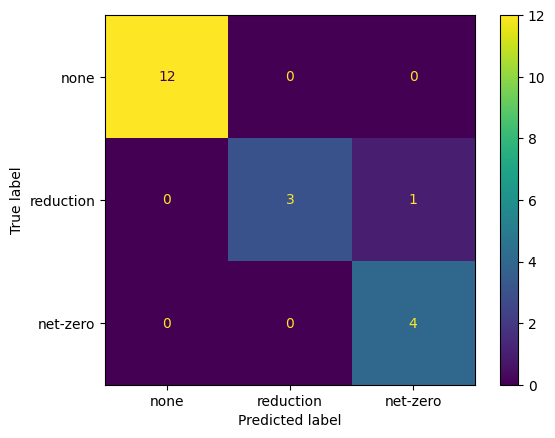

In [ ]:
# Additional visualization to understand the results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_num, predictions_1_num))
confMat = confusion_matrix(y_num, predictions_1_num)
disp = ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=["none", "reduction", "net-zero"])
disp.plot()
plt.show()

In [ ]:
### PART 4

# Look at the misclassifications. It could reveal interesting model behaviour.
for i, t in enumerate(texts):
  if y_num[i] != predictions_1_num[i]:
    print("Missmatched text:")
    print(t)
    print(f"True Label: {y[i]}")
    print(f"Predicted Label: {predictions_1[i]}")
    print()

Missmatched text:
This year, we want to reduce our emissions in the production by 50%, ultimately aiming for net zero at 2050.
True Label: reduction
Predicted Label: net-zero



It becomes apparent that the mismatch can happen when both reduction and net zero targets are there at the same time. The model is trained to predict "net-zero" in the case of co-existence of both targets. However, these are model edge cases that are important in the real-world usage.